# UFO Sightings Analysis

## by Justin Sierchio

In this analysis, we will be looking at reports of Unidentified Flying Objects (UFOs) from the National UFO Reporting Center. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>Which areas are more likely to have sightings?</li>
    <li>What times of the year are more likely for sightings to occur?</li>
    <li>Are there clusters around military bases or other government installations?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/NUFORC/ufo-sightings/download. More information related to the dataset can be found at: https://www.kaggle.com/NUFORC/ufo-sightings?select=complete.csv.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_UFO = pd.read_csv("scrubbed.csv");

print('Datasets uploaded!');

Datasets uploaded!


C:\Users\jmsie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Display 1st 5 rows from UFO Sightings dataset
df_UFO.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Data Cleaning

In [4]:
df_UFO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


Given that some of the data has varying time stamps and other information, let us do a little cleaning. We'll begin with the time and data information.

In [5]:
# Clean Up Time and Date Information

# Fix datetimes
df_UFO['datetime'] = pd.to_datetime(df_UFO['datetime'], errors='coerce')
df_UFO.insert(1, 'year', df_UFO['datetime'].dt.year)
df_UFO['year'] = df_UFO['year'].fillna(0).astype(int)

# Display new 1st 5 rows
df_UFO.head(5)

,datetime,year,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,1949,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,1949,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,1955,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,1956,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,1960,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


Now let us clean up the location information (city, state, latitude, longitude).

In [6]:
# Clean up Location Information

# City information
df_UFO['city'] = df_UFO['city'].str.title() # Capitalize the first letter

# State information
df_UFO['state'] = df_UFO['state'].str.upper() # Two letter capital abbreviations

# Latitude information
df_UFO['latitude'] = pd.to_numeric(df_UFO['latitude'], errors='coerce') # Change to a numeric value

# Latitude & Longitude
df_UFO = df_UFO.rename(columns={'longitude ':'longitude'})

df_UFO.head(5)

,datetime,year,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,1949,San Marcos,TX,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,1949-10-10 21:00:00,1949,Lackland Afb,TX,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,1955-10-10 17:00:00,1955,Chester (Uk/England),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,1956-10-10 21:00:00,1956,Edna,TX,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,1960-10-10 20:00:00,1960,Kaneohe,HI,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


Given that the data is random outside the United States, we will only evaluate sightings within the US. To do this, we will create an array for all 50 US states and then only include data that is contained in one of the those 50 US states.

In [7]:
# Create array of US States
states_array = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 
                           'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 
                           'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 
                           'WI', 'WV', 'WY'])

In [8]:
# Only count sightings within the 50 US states

# Create a copy of the original dataset for later use
df_UFO3 = df_UFO[::1]

# Sort data by year
df_UFO = df_UFO[df_UFO['state'].isin(states_array)].sort_values('year')

# Make sure the latitude and longitude data only confines data to areas encompassed by the US
df_UFO = df_UFO[(df_UFO.latitude > 15) & (df_UFO.longitude < -65)]
df_UFO = df_UFO[(df_UFO.latitude > 50) & (df_UFO.longitude > -125) == False]

# Remove any other countries in the dataset
df_UFO = df_UFO[df_UFO['city'].str.contains('\(Canada\)|\(Mexico\|(UK/England)|(Australia)') == False]

C:\Users\jmsie\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Let's once again look at the 1st 5 rows of the cleaned dataset.

In [9]:
df_UFO.head(5)

,datetime,year,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
14868,NaT,0,Charestown,IN,NaN,circle,600,ten min,it&#39s was very brght :and ciricular object t...,1/17/2004,38.453120,-85.670241
43727,NaT,0,Malaga,NJ,us,sphere,60,60 sec,what i saw had no tail it was a blue light ...,6/12/2008,39.569722,-75.048056
35114,NaT,0,Port Salerno,FL,us,unknown,2,just a few seconds,two lights connected to nothing going from the...,3/19/2002,27.143889,-80.200833
9117,NaT,0,Henderson,TX,us,NaN,180,three minutes,i saw a mothership letting off flying sausers,3/19/2002,32.153056,-94.799167
73756,NaT,0,Dennis,MA,us,circle,1260,21:00,Bright orange orb at a very high rate of speed...,9/24/2012,41.735278,-70.194444


It appears our data is sufficiently cleaned to begin an analysis.

## Data Analysis

The first question we wanted to answer was were there any areas that had a higher propensity for sightings. To answer this question, let us look at the top 10 states with sightings.

In [10]:
# List the Top 10 states for UFO sightings
print('Here are the Top 10 States with UFO Sightings:\n')
print('State # Sightings (% of Total)\n')
df_UFO_TypePerc = 100. * df_UFO['state'].value_counts() / len(df_UFO);
print(df_UFO_TypePerc.head(10))

Here are the Top 10 States with UFO Sightings:

State # Sightings (% of Total)

CA    13.620765
WA     6.020251
FL     5.925633
TX     5.192696
NY     4.543079
AZ     3.794608
IL     3.732471
PA     3.642090
OH     3.420373
MI     2.923275
Name: state, dtype: float64


As we see, California leads the US with 13.6% of the continental US sightings, followed by Washington (6.0%), Florida (5.9%), and Texas (5.2%). However, these are some of the largest states. Let's normalize this data by each state's popualtion to get an idea of which states have the highest density of sightings.

Using https://state.1keydata.com/state-population-density.php, I created an Excel file with total area.

In [11]:
# Upload Population Density dataset
df_USStatesPopDensity = pd.read_excel("US_states_popdensity.xlsx");

print('Dataset uploaded!');

Dataset uploaded!


In [12]:
# Display 1st 5 rows of US States population density dataset
df_USStatesPopDensity.head(5)

,rank,state,name,population,land area,pop density
0,1,NJ,New Jersey,8958013,7417,1207.8
1,2,RI,Rhode Island,1056298,1045,1010.8
2,3,MA,Massachusetts,6794422,7840,866.6
3,4,CT,Connecticut,3590886,4845,741.2
4,5,MD,Maryland,6006401,9774,614.5


To accomplish our goal, we will convert the resulting number of sightings per state into a new dataframe. Then we will join it with our US population density dataset. This merged set will allow us to find which state has the highest number of sightings per populated square mile.

In [13]:
# Create new State Count Variable
value_counts = df_UFO['state'].value_counts(dropna=True, sort=True)

# Create new dataframe
df_UFO_State = pd.DataFrame(value_counts)
df_UFO_State = df_UFO_State.reset_index()
df_UFO_State.columns = ['state', 'counts']

# Display 1st 5 rows of dataset
df_UFO_State.head()

,state,counts
0,CA,9645
1,WA,4263
2,FL,4196
3,TX,3677
4,NY,3217


Now that we have a new dataframe, let's join this new dataset with the population density dataset.

In [14]:
df_UFO_Density = df_UFO_State.join(df_USStatesPopDensity.set_index('state'), on='state');
df_UFO_Density.head()

,state,counts,rank,name,population,land area,pop density
0,CA,9645,11.0,California,39144818.0,155959.0,251.0
1,WA,4263,23.0,Washington,7170351.0,66544.0,107.8
2,FL,4196,8.0,Florida,20271272.0,53927.0,375.9
3,TX,3677,26.0,Texas,27469114.0,261797.0,104.9
4,NY,3217,7.0,New York,19795791.0,47214.0,419.3


Now that we have our merged dataset, let's add another column for sighting density.

In [15]:
# Create column for sighting density by state
df_UFO_Density['Sighting Density (Counts/People/Square Mile)'] = df_UFO_Density['counts'] / df_UFO_Density['pop density'];
df_UFO_Density.head()

,state,counts,rank,name,population,land area,pop density,Sighting Density (Counts/People/Square Mile)
0,CA,9645,11.0,California,39144818.0,155959.0,251.0,38.426295
1,WA,4263,23.0,Washington,7170351.0,66544.0,107.8,39.545455
2,FL,4196,8.0,Florida,20271272.0,53927.0,375.9,11.162543
3,TX,3677,26.0,Texas,27469114.0,261797.0,104.9,35.052431
4,NY,3217,7.0,New York,19795791.0,47214.0,419.3,7.672311


Now we have the data necessary to find the sighting count density by state.

In [16]:
# List the Top 10 states for UFO sightings (counts / sq. mile)
print('Here are the Top 10 States with UFO Sightings/People/Square Mile:\n')
df_UFO_Density_State = df_UFO_Density.sort_values(by=['Sighting Density (Counts/People/Square Mile)'], ascending=False);
df_UFO_Density_State.head(10)

Here are the Top 10 States with UFO Sightings/People/Square Mile:



,state,counts,rank,name,population,land area,pop density,Sighting Density (Counts/People/Square Mile)
42,AK,352,50.0,Alaska,738432.0,571951.0,1.3,270.769231
38,MT,509,48.0,Montana,1032949.0,145552.0,7.1,71.690141
27,NM,814,45.0,New Mexico,2085109.0,121356.0,17.2,47.325581
5,AZ,2687,33.0,Arizona,6828065.0,113635.0,60.1,44.708819
11,OR,1844,39.0,Oregon,4028977.0,95997.0,42.0,43.904762
1,WA,4263,23.0,Washington,7170351.0,66544.0,107.8,39.545455
0,CA,9645,11.0,California,39144818.0,155959.0,251.0,38.426295
3,TX,3677,26.0,Texas,27469114.0,261797.0,104.9,35.052431
26,NV,903,42.0,Nevada,2890845.0,109826.0,26.3,34.334601
46,WY,202,49.0,Wyoming,586107.0,97100.0,6.0,33.666667


As one can see, Alaska leads the nation, followed by Montana, New Mexico, Arizona and Oregon. All these states are located in the western United States with clearer skies and lower population densities.

Of states with at least 100 people per square mile, Washington state leads the nation followed by California and Texas.

Let's look at the states with the lowest number of sightings per people per square mile.

In [17]:
df_UFO_Density_State.tail(10)

,state,counts,rank,name,population,land area,pop density,Sighting Density (Counts/People/Square Mile)
44,VT,306,31.0,Vermont,626042.0,9250.0,67.7,4.519941
37,NH,534,21.0,New Hampshire,1330608.0,8968.0,148.4,3.598383
43,HI,352,13.0,Hawaii,1431603.0,6423.0,222.9,1.579183
17,MA,1355,3.0,Massachusetts,6794422.0,7840.0,866.6,1.563582
25,MD,911,5.0,Maryland,6006401.0,9774.0,614.5,1.482506
23,CT,967,4.0,Connecticut,3590886.0,4845.0,741.2,1.304641
13,NJ,1510,1.0,New Jersey,8958013.0,7417.0,1207.8,1.250207
48,DE,182,6.0,Delaware,945934.0,1954.0,484.1,0.375955
45,RI,288,2.0,Rhode Island,1056298.0,1045.0,1010.8,0.284923
50,DC,96,NaN,NaN,NaN,NaN,NaN,NaN


As one might guess, states in the Northeast (Maryland, Connecticut, New Jersey, Delaware and Rhode Island) have the fewest sightings per people per square mile. A possible reason for this is the light pollution living in more urban environments.

Now let's look at what time of the year sightings occur. To do this, let us first extrapolate the months from the copy of the dataset we created earlier.

In [18]:
# Load 1st 5 rows of original copied dataset
df_UFO3.head()

,datetime,year,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,1949,San Marcos,TX,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,1949-10-10 21:00:00,1949,Lackland Afb,TX,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,1955-10-10 17:00:00,1955,Chester (Uk/England),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,1956-10-10 21:00:00,1956,Edna,TX,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,1960-10-10 20:00:00,1960,Kaneohe,HI,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


In [19]:
# Create columns for hour, day, month and year from copied original UFO sightings dataset
df_UFO3['hour'] = pd.DatetimeIndex(df_UFO3['datetime']).hour 
df_UFO3['day'] = pd.DatetimeIndex(df_UFO3['datetime']).day 
df_UFO3['month'] = pd.DatetimeIndex(df_UFO3['datetime']).month 
df_UFO3['year'] = pd.DatetimeIndex(df_UFO3['datetime']).year 
df_UFO3['datetime'] = pd.to_datetime(df_UFO3['datetime'], errors='coerce')

# Display 1st 5 rows of modified copied dataset
df_UFO3.head(5)

,datetime,year,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,hour,day,month
0,1949-10-10 20:30:00,1949.0,San Marcos,TX,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,20.0,10.0,10.0
1,1949-10-10 21:00:00,1949.0,Lackland Afb,TX,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,21.0,10.0,10.0
2,1955-10-10 17:00:00,1955.0,Chester (Uk/England),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,17.0,10.0,10.0
3,1956-10-10 21:00:00,1956.0,Edna,TX,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,21.0,10.0,10.0
4,1960-10-10 20:00:00,1960.0,Kaneohe,HI,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,20.0,10.0,10.0


In [20]:
# Create column for months and sort the values in order by month
df_UFO3_Month = df_UFO3['month'].value_counts().head(12);
df_UFO3_MonthSorted = df_UFO3_Month.sort_index()
df_UFO3_MonthSorted

1.0     5632
2.0     4626
3.0     5408
4.0     5492
5.0     5240
6.0     8019
7.0     9441
8.0     8588
9.0     7535
10.0    7343
11.0    6691
12.0    5623
Name: month, dtype: int64

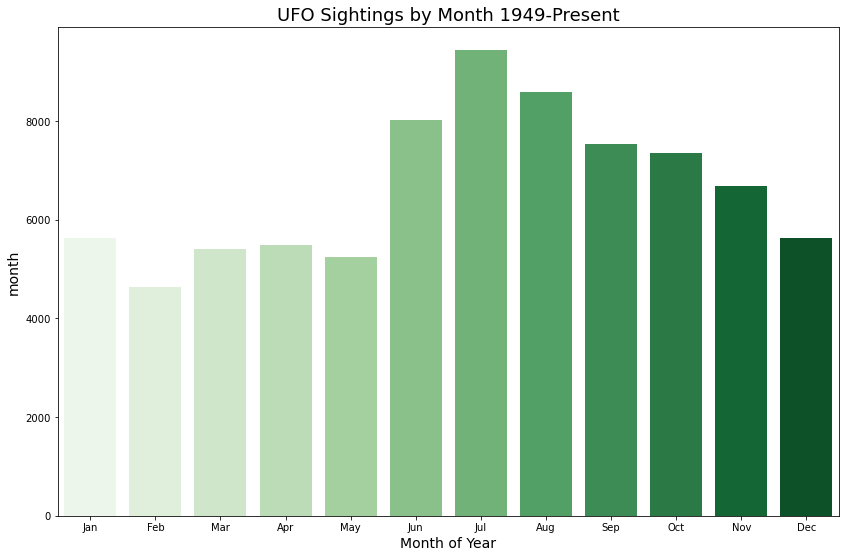

In [21]:
# Plot the UFO sightings by month for entire dataset
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = df_UFO3_MonthSorted;

fig= plt.figure(figsize=(14,9))
plt.xlabel('Month of Year', fontsize  = 14)
plt.ylabel('# of UFO Sightings', fontsize = 14)
plt.title('UFO Sightings by Month 1949-Present', fontsize  = 18)
UFOTimeOfYearPlot = sns.barplot(x = x, y = y, palette = 'Greens')

As shown by the graph above, the peak time of year for UFO sightings is during the summer months of June, July and August. Possibly explanations for this include more people are traveling during these months (so they are more likely to be in rural areas) as well as the generally better weather (clearer skies).

Now let's see what time of the day presents the greatest likelihood for sighting a UFO.

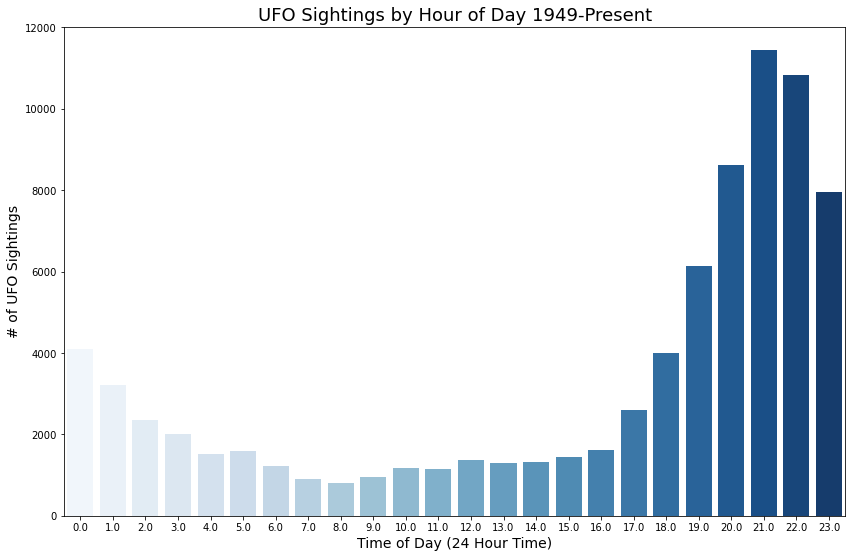

In [22]:
# Create a plot for sightings vs. time of day

# Sort the sightings by hour of day
df_UFO3_Hour = df_UFO3['hour'].value_counts() 
df_UFO3_HourIndex = df_UFO3_Hour.index 
df_UFO3_HourValues = df_UFO3_Hour.values

# Name axes for plotting
x = df_UFO3_HourIndex
y = df_UFO3_HourValues

# Plot the data for sightings by hour of day
plt.figure(figsize=(14,9))
plt.title('UFO Sightings by Hour of Day 1949-Present', fontsize=18)
plt.xlabel("Time of Day (24 Hour Time)", fontsize=14)
plt.ylabel("# of UFO Sightings", fontsize=14)
UFOTimeOfDayPlot = sns.barplot(x = x[:60], y = y[:60], palette = 'Blues')

According to the graph above, the times with the largest number of sightings is between 8pm and 11pm local time. This observation appears to make sense when one considers that (a) there are still a large number of people awake and (b) it is generally easier to discern something out of the ordinary at night (i.e. white object on a black background) than in reverse.

The last question we are interested in is the number of sightings and how they relate geographically to the locations of military or other government installations.

Conducting a web search, I was able to find the following dataset (https://public.opendatasoft.com/explore/dataset/military-bases/download/?format=xls&timezone=America/Chicago&lang=en&use_labels_for_header=true) that contains the latitude and longitude of each US military installation. Let us load that data into our project and display the 1st 5 rows as usual.

In [23]:
# Upload US military installation dataset
df_USMilBases = pd.read_excel('military-bases.xlsx')

print('Database uploaded!')

Database uploaded!


In [24]:
# Display 1st 5 rows of US military installation dataset
df_USMilBases.head(5)

,Geo Point,Geo Shape,OBJECTID_1,OBJECTID,COMPONENT,Site Name,Joint Base,State Terr,COUNTRY,Oper Stat,PERIMETER,AREA,Shape_Leng,Shape_Area
0,"36.6032534708, -121.912105279","{""type"": ""Polygon"", ""coordinates"": [[[-121.896...",48,105,Army Active,Presidio of Monterey,NaN,California,United States,Active,4.351336,0.610378,9080.019355,2.457794e+06
1,"18.4127920097, -66.1214794902","{""type"": ""Polygon"", ""coordinates"": [[[-66.1153...",88,637,Army Reserve,Fort Buchanan,NaN,Puerto Rico,Puerto Rico,Active,7.450958,1.151803,12589.594748,3.331642e+06
2,"36.9215240082, -76.322723548","{""type"": ""Polygon"", ""coordinates"": [[[-76.3245...",182,1318,Navy Active,Fire Fighters School,NaN,Virginia,United States,Active,0.577083,0.019152,1204.220262,7.775643e+04
3,"13.3903260139, 144.686307577","{""type"": ""Polygon"", ""coordinates"": [[[144.6871...",212,1432,Navy Active,Magazine Reservoir Naval Magazine,Joint Region Marianas,Guam,Guam,Active,0.493207,0.016011,802.090588,4.408140e+04
4,"35.3646392145, -86.0796716743","{""type"": ""Polygon"", ""coordinates"": [[[-86.0776...",242,1643,AF Active,Arnold,NaN,Tennessee,United States,Active,70.915313,60.768230,144104.967168,2.371972e+08


We will use folium for this exercise. To begin, let's make sure the Python package is installed.

In [25]:
# Install folium into local Jupyter Notebook
!pip install folium

print('Successfully installed folium package!')

Now let's load a map of the United States.

In [27]:
# Create a map of Texas
import folium
USA_map = folium.Map([31.51073, -96.4247], zoom_start=4)
USA_map

In [39]:
# Rename the Geopoint Column in the US installation dataset
df_USMilBases.rename(columns = {'Geo Point':'Geopoint'}, inplace = True)

# Split the Longitude and Latitude information from the Geopoint column in the US installation dataset
df_USMilBases[['Latitude','Longitude']] = df_USMilBases['Geopoint'].str.split(expand=True)

# Remove the extra commas from the Latitude and Longitude columns in the US installation dataset
df_USMilBases['Latitude'] = df_USMilBases['Latitude'].str.replace(',', '')
df_USMilBases['Longitude'] = df_USMilBases['Longitude'].str.replace(',', '')

# Convert the Latitude and Longitude columns in the US installation dataset to floats
df_USMilBases['Latitude'] = df_USMilBases['Latitude'].astype(float)
df_USMilBases['Longitude'] = df_USMilBases['Longitude'].astype(float)

df_USMilBases.head(5)

,Geopoint,Geo Shape,OBJECTID_1,OBJECTID,COMPONENT,Site Name,Joint Base,State Terr,COUNTRY,Oper Stat,PERIMETER,AREA,Shape_Leng,Shape_Area,Latitude,Longitude
0,"36.6032534708, -121.912105279","{""type"": ""Polygon"", ""coordinates"": [[[-121.896...",48,105,Army Active,Presidio of Monterey,NaN,California,United States,Active,4.351336,0.610378,9080.019355,2.457794e+06,36.603253,-121.912105
1,"18.4127920097, -66.1214794902","{""type"": ""Polygon"", ""coordinates"": [[[-66.1153...",88,637,Army Reserve,Fort Buchanan,NaN,Puerto Rico,Puerto Rico,Active,7.450958,1.151803,12589.594748,3.331642e+06,18.412792,-66.121479
2,"36.9215240082, -76.322723548","{""type"": ""Polygon"", ""coordinates"": [[[-76.3245...",182,1318,Navy Active,Fire Fighters School,NaN,Virginia,United States,Active,0.577083,0.019152,1204.220262,7.775643e+04,36.921524,-76.322724
3,"13.3903260139, 144.686307577","{""type"": ""Polygon"", ""coordinates"": [[[144.6871...",212,1432,Navy Active,Magazine Reservoir Naval Magazine,Joint Region Marianas,Guam,Guam,Active,0.493207,0.016011,802.090588,4.408140e+04,13.390326,144.686308
4,"35.3646392145, -86.0796716743","{""type"": ""Polygon"", ""coordinates"": [[[-86.0776...",242,1643,AF Active,Arnold,NaN,Tennessee,United States,Active,70.915313,60.768230,144104.967168,2.371972e+08,35.364639,-86.079672


Now let's load the geolocation points for each of the US military installations in our dataset.

In [40]:
# Add Chase Locations to US Map
for i in range(0,len(df_USMilBases)):
    folium.Marker([df_USMilBases.iloc[i]['Latitude'], df_USMilBases.iloc[i]['Longitude']], 
                  popup=df_USMilBases.iloc[i]['Site Name']).add_to(USA_map)

# Re-Display US Map
USA_map